In [1]:
%matplotlib inline

# Head First Statistics

## by Dawn Griffiths

### Copyright © 2009 O’Reilly Media, Inc. All rights reserved.

### ISBN: 978-0-596-52758-7

<img src="images/hf_stat_front_cover.jpg" alt="Book Front Cover" style="width: 50%;"/>

# Chapter 1 visualizing information
## First Impressions

### Statistics definition
Statistics are numbers that summarize raw facts and figures in some
meaningful way. 

They present key ideas that may not be immediately
apparent by just looking at the raw data, and by data, we mean facts or figures
from which we can draw conclusions. 

#### example
Calculate the league position of all participating teams from all the match results of the current season.

This is a nice summary that save supporters lots of time.

## Pie charts
Pie charts work by splitting your data into distinct groups or categories.
The chart consists of a circle split into wedge-shaped slices, and each slice
represents a group. The size of each slice is proportional to how many are
in each group compared with the others. The larger the slice, the greater
the relative popularity of that group. The number in a particular group is
called the **frequency**.

Pie charts devide your total dataset into distinct groups or categories that are represented as slices.
The sum of frequencies of each slice should represent 100%; the complete dataset.

### Frequency
Frequency describes how many items there are in a particular group or interval. 

It’s like a count of how many there are.


### Example: Units of games sold by genre

| Genre    | Units sold |
| -------- | ---------- |
| Sports   | 27,500     |
| Strategy | 11,500     |
| Action   | 6,000      |
| Shooter  | 3,500      |
| Other    | 1,500      |


The labels variable is of type <class 'tuple'>
The units_solds variable is of type <class 'list'>
The explode variable is of type <class 'tuple'>
The sales_plot_fig variable is of type <class 'matplotlib.figure.Figure'>
The sales_plot_axes variable is of type <class 'matplotlib.axes._subplots.AxesSubplot'>


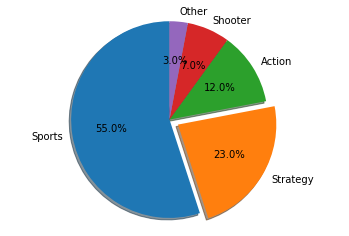

In [3]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Sports', 'Strategy', 'Action', 'Shooter', 'Other'
print(f'The labels variable is of type {type(labels)}')
units_solds = [27_500, 11_500, 6_000, 3_500, 1_500]
print(f'The units_solds variable is of type {type(units_solds)}')
explode = (0, 0.1, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Strategy')
print(f'The explode variable is of type {type(explode)}')

sales_plot_fig, sales_plot_axes = plt.subplots() # example of tuple unpacking
print(f'The sales_plot_fig variable is of type {type(sales_plot_fig)}')
print(f'The sales_plot_axes variable is of type {type(sales_plot_axes)}')

# Because we use a keyword arguments instead of a positional arguments for optional ones their position
# won't matter.
# the autopct='%1.1f%%' argument translates the numbers into percentages formatted with 1 decimal accuracy
sales_plot_axes.pie(units_solds, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
sales_plot_axes.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

### When not to use pie charts
Pie charts are less useful if all the slices have
similar sizes, as it’s difficult to pick up on subtle differences between
the slice sizes.

### Example: visualizing satisfactory rate per genre
| Genre    | satisfied customers in % |
| -------- | -------------------------|
| Sports   | 99                       |
| Strategy | 90                       |
| Action   | 85                       |
| Shooter  | 95                       |
| Other    | 85                       |

#### Trying to visualize this in a pie chart

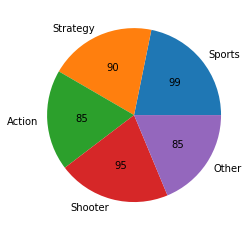

In [4]:
# We want to show the original figures not the automatically calculated percentages
# Therefore, we can use this function with the autopct keyword argument
# See https://stackoverflow.com/questions/53782591/how-to-display-actual-values-instead-of-percentages-on-my-pie-chart-using-matplo
def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{v:d}'.format(v=val)
    return my_format

# we already have the labels tuple variable
# The order of percentages should correspond with the labels tuple
# which is the same as the order in the table in the previous cell
satisfaction_rate = [99, 90, 85, 95, 85]

satisfaction_fig, satisfaction_axes = plt.subplots() # example of tuple unpacking
satisfaction_axes.pie(satisfaction_rate, labels=labels, autopct = autopct_format(satisfaction_rate))

plt.show()